## Demonstration: Automating the Detection of Trends via Python
Prepared by Nick Freeman, PhD

This note book demonstrates how Python can be used to automate the process of checking for trends in time series data. It assumes that data files that include time series data for multiple products exist in a sub-folder of the working directory. The following code block imports several libraries that we will use.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The following code block show how we can use Pandas and Seaborn to read in a one of the product data files and plot the associated time series data.

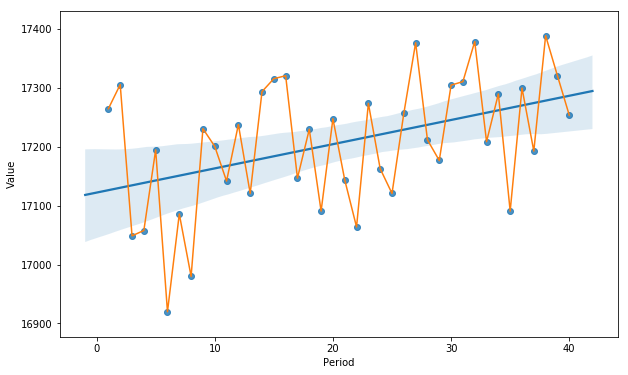

In [2]:
data = pd.read_csv('data/Product_1.csv')

fig, ax = plt.subplots(figsize = (10, 6))
sns.regplot(x='Period', y = 'Value', data = data, ax = ax)
sns.lineplot(x='Period', y = 'Value', data = data, ax = ax)
plt.show()

The following code block shows how we can use Numpy's `polyfit` function to estimate the slope and intercept of a linear regression fit for the current data.

In [3]:
np.polyfit(data['Period'], data['Value'], 1)

array([4.11294559e+00, 1.71224346e+04])

The following code block shows how we can define an interactive function that plots the data for each file and displays the slope and intercept in the plot title.

In [4]:
subfolder = 'data/'
datafile_list = os.listdir(subfolder)

@interact(datafile = datafile_list)

def interactive_plot(datafile = datafile_list[0]):
    data = pd.read_csv(subfolder + datafile)
    est = np.polyfit(data['Period'], data['Value'], 1)
    
    fig, ax = plt.subplots(figsize = (10, 6))
    sns.regplot(x='Period', y = 'Value', data = data, ax = ax)
    sns.lineplot(x='Period', y = 'Value', data = data, ax = ax)
    ax.set_title(f'Plot for {datafile[:-4]}\n(slope = {np.round(est[0],2)}, intercept = {np.round(est[1],2)})',
                fontsize = 16)
    plt.show()

    

interactive(children=(Dropdown(description='datafile', options=('Product_1.csv', 'Product_10.csv', 'Product_10…

The following code block allows a user to define a subfolder that includes the data files with the time series data for the various products. For each data file in the user-specified sub-folder, the following code block:

1. imports the data into a Pandas `DataFrame` object,
2. fits a first-degree polynomial (i.e., a line) to the current data, and 
3. stores the current product, fit intercept, and fit slope in separate lists.    

In [5]:
products = []
intercepts = []    
slopes = []

# Identify the sub-folder that contains the data files
sub_folder = 'data/'

# Loop through all files in the sub-folder
for file in os.listdir(sub_folder):
    
    # Update the filename variable to include the
    # sub-folder and file name
    filename = sub_folder + file
    
    # Use Pandas to read the current csv
    # file into a DataFrame
    data = pd.read_csv(filename)
    
    # Add the current product name to the products list
    products.append(file[:-4])
    
    # Fit a first-degree polynomial (i.e., a line)
    # to the current time series
    est = np.polyfit(data['Period'], data['Value'], 1)
    
    # Append the fit slope to the slopes list
    slopes.append(est[0])
    
    # Append the fit intercept to the intercepts list
    intercepts.append(est[1])

The following code block:
    
1. uses the lists constructed in the previous code block to create a dictionary,
2. uses the dictionary to define a Pandas `DataFrame`,
3. adds a column to the `DataFrame` that captures the absolute percent change as $abs(Slope/Intercept)$,
4. sorts the `DataFrame` by absolute percent change, from high to low, and
5. writes the `DataFrame` object to an Excel workbook.

In [6]:
# Create a dictionary from the created lists
my_dict = {'Product': products,
           'Intercept': intercepts,
           'Slope': slopes}

# Use the dictionary to create a Pandas DataFrame
# object that is stored in the variable summary
summary = pd.DataFrame.from_dict(my_dict)

# Calculate the absolute percent change for each row of the 
# summary object
summary['Percent_Change'] = abs(summary['Slope']/summary['Intercept'])

# Sort the data by percent change, from high to low
summary = summary.sort_values(by = 'Percent_Change', ascending = False)

# Write the summary object to an Excel workbook
summary.to_excel('Summary.xlsx', index = False)

The following code block combines all of the previous coude to show the compact form in which the complete program can be written.

In [7]:
products, intercepts, slopes = ([] for i in range(3))

sub_folder = 'data/'

for file in os.listdir(sub_folder):
    data = pd.read_csv(sub_folder + file)
    est = np.polyfit(data['Period'], data['Value'], 1)
    products.append(file[:-4])
    slopes.append(est[0])
    intercepts.append(est[1])
    
    summary = pd.DataFrame.from_dict({'Product': products,
                                      'Intercept': intercepts,
                                      'Slope': slopes})

    summary['Percent_Change'] = abs(summary['Slope']/summary['Intercept'])
    summary.sort_values(by = 'Percent_Change', ascending = False).to_excel('Summary.xlsx', index = False)